In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.io.json import json_normalize
from pyecharts import Bar

In [2]:
plt.style.use('ggplot')
from pylab import mpl
plt.rcParams['font.sans-serif'] = ['SimHei']  # 中文字体设置-黑体
plt.rcParams['axes.unicode_minus'] = False  # 解决保存图像是负号'-'显示为方块的问题
sns.set(font='SimHei')
plt.rc('figure',figsize=(10,10))#调整图片默认尺
%matplotlib inline

In [3]:
#连接mongo数据库
from pymongo import MongoClient 
conn = MongoClient(host='127.0.0.1',port=27017)
db = conn.get_database('Lianjia')

zufang = db.get_collection('zufang')
mon_data = zufang.find()

In [4]:
data = json_normalize([comment for comment in mon_data])
data.head()

,_id,bathroom_num,bedroom_num,bizcircle_name,city,dist,distance,frame_orientation,hall_num,house_tag,house_title,latitude,layout,longitude,m_url,rent_area,rent_price_listing,rent_price_unit,resblock_name,type
0,5c9b4f2a375ca1f083f0b208,1,1,安定门,北京,朝阳,552,东南,1,近地铁 随时看房,整租 · 安定门 西营房 2号线 近地铁 精装修可随时入住,39.958188,1室1厅1卫,116.409688,https://m.lianjia.com/chuzu/bj/zufang/BJ220353...,56,6800,元/月,西营房,整租
1,5c9b4f2c375ca1f083f0b20a,1,2,安定门,北京,朝阳,506,南 北,1,近地铁 集中供暖 随时看房,整租 · 永康胡同中间楼层两居室，南北通透，看房方便有钥匙,39.953993,2室1厅1卫,116.41695,https://m.lianjia.com/chuzu/bj/zufang/BJ221288...,67,8500,元/月,永康胡同1号院,整租
2,5c9b4f2e375ca1f083f0b20d,1,2,安定门,北京,朝阳,960,南 北,1,近地铁 精装 集中供暖 新上 随时看房,整租 · \n房子南北通透，二居室，前后无遮挡，小区安静,39.96471,2室1厅1卫,116.410078,https://m.lianjia.com/chuzu/bj/zufang/BJ221730...,58,7200,元/月,黄寺大街2号院,整租
3,5c9b4f30375ca1f083f0b20f,1,2,安定门,北京,朝阳,552,东 南,1,近地铁 精装 新上 随时看房,整租 · 西营房 低楼层 精装修两居 采光好 临近安定门地铁,39.958188,2室1厅1卫,116.409688,https://m.lianjia.com/chuzu/bj/zufang/BJ221853...,89,10000,元/月,西营房,整租
4,5c9b4f32375ca1f083f0b211,2,3,安定门,北京,朝阳,552,西北,1,近地铁 精装 双卫生间 随时看房,整租 · 北二环 安定门 精装大三居 带电梯 视野开阔,39.958188,3室1厅2卫,116.409688,https://m.lianjia.com/chuzu/bj/zufang/BJ219691...,103,12000,元/月,西营房,整租


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102746 entries, 0 to 102745
Data columns (total 20 columns):
_id                   102746 non-null object
bathroom_num          102746 non-null object
bedroom_num           102746 non-null object
bizcircle_name        102746 non-null object
city                  102746 non-null object
dist                  102746 non-null object
distance              53623 non-null object
frame_orientation     102746 non-null object
hall_num              102746 non-null object
house_tag             82014 non-null object
house_title           102746 non-null object
latitude              102081 non-null object
layout                102746 non-null object
longitude             102081 non-null object
m_url                 102746 non-null object
rent_area             102746 non-null object
rent_price_listing    102746 non-null object
rent_price_unit       102746 non-null object
resblock_name         102746 non-null object
type                  102746 non-nul

In [6]:
#随机选取数据
data_sample = pd.concat([data[data['city']==city].sample(3000) for city in ['北京','上海','广州','深圳']])
data_sample.to_csv('data_sample.csv',index=False)

## 清洗数据

In [7]:
data = data.drop(columns='_id')#去掉id列

In [8]:
data['bathroom_num'].unique()

array(['1', '2', '3', '0', '4', '5', '7', '6', '8', '9', '11'],
      dtype=object)

In [9]:
data[data['bathroom_num'].isin(['8','9','11'])]

,bathroom_num,bedroom_num,bizcircle_name,city,dist,distance,frame_orientation,hall_num,house_tag,house_title,latitude,layout,longitude,m_url,rent_area,rent_price_listing,rent_price_unit,resblock_name,type
9284,8,9,四季青,北京,海淀,725,南 西 北,6,精装,整租 · wehoue 城市别墅 联排别墅 私家电梯使用面积1200平米,39.947186,9室6厅8卫,116.275381,https://m.lianjia.com/chuzu/bj/zufang/BJ213593...,318,138000,元/月,Wehouse,整租
13518,8,17,潞苑,北京,通州,None,南 北,3,精装 随时看房,整租 · 枫露皇苑 17室3厅 40000元,39.94142,17室3厅8卫,116.671872,https://m.lianjia.com/chuzu/bj/zufang/BJ221662...,410,40000,元/月,枫露皇苑,整租
15255,9,9,北七家,北京,昌平,None,东 南 西 北,5,精装,整租 · 精装修独栋别墅，家具家电齐全，可直接入住！,40.146554,9室5厅9卫,116.418277,https://m.lianjia.com/chuzu/bj/zufang/BJ203027...,544,40000,元/月,麦卡伦地,整租
26970,9,10,花木,上海,浦东,404,南,5,近地铁,花木路1701号 15房间9卫 330000元,31.220902,10室5厅9卫,121.570658,https://m.lianjia.com/chuzu/sh/zufang/SH212387...,581,330000,元/月,花木路1701号,整租
31885,8,7,祝桥,上海,浦东,None,南 北,3,None,东海御庭 7室3厅 16000元,31.214139,7室3厅8卫,121.776494,https://m.lianjia.com/chuzu/sh/zufang/SH206789...,767,16000,元/月,东海御庭,整租
36922,8,6,龙柏,上海,闵行,528,南 北,3,近地铁,整租 · 大降价！！性价别墅！！可整租可分层出租，价格可谈！,31.18634,6室3厅8卫,121.373958,https://m.lianjia.com/chuzu/sh/zufang/SH215562...,949,65000,元/月,汇金公寓,整租
40588,8,8,莘闵别墅,上海,松江,None,南,4,None,桃花源田庄 精装 拎包入住 可办公可居家 200平地下室,31.101212,8室4厅8卫,121.354455,https://m.lianjia.com/chuzu/sh/zufang/SH219030...,504,40000,元/月,桃花源田庄,整租
43504,8,8,赵巷,上海,青浦,None,未知,6,None,整租 · 御湖香水湾，水景独栋，大花园，业主诚意出租。,31.158286,8室6厅8卫,121.248358,https://m.lianjia.com/chuzu/sh/zufang/SH192424...,498,30000,元/月,香水湾,整租
49942,9,9,南湖,广州,白云,None,东南,5,None,南湖庄园 9室5厅 50000元,23.217537,9室5厅9卫,113.332386,https://m.lianjia.com/chuzu/gz/zufang/GZ219970...,1100,50000,元/月,南湖庄园,整租
55882,11,2,东湖,广州,越秀,260,南 北,1,None,大沙头路两房 采光通风好,23.120535,2室1厅11卫,113.290942,https://m.lianjia.com/chuzu/gz/zufang/GZ216230...,60,4000,元/月,大沙头路,整租


In [10]:
data = data.drop([55882]) #这行数据是异常数据 

In [11]:
# The number of bedrooms. The houses which have too many bedrooms are bulit to share
data['bedroom_num'].unique()

array(['1', '2', '3', '4', '5', '6', '7', '14', '8', '9', '0', '17', '11',
       '10', '15', '12', '16', '20'], dtype=object)

In [12]:
#distance This column is useless now
data['frame_orientation'].unique()

array(['东南', '南 北', '东 南', '西北', '东', '南', '东南 北', '东 西', '南 西', '东 北',
       '西南', '南 西 北', '西 北', '北', '东 东北', '东 南 西', '东 南 北', '东北', '西',
       '东 西 北', '北 东北', '南 西北', '东南 南', '东 南 西 北', '东南 西南', '东 东南',
       '东 西北 北', '西南 北', '西北 北', '南 西南', '西 西北', '东南 西北 北', '东 西 西北',
       '东 西南', '东南 南 北', '东 南 西北', '南 西南 北', '东南 南 西南', '东南 西', '南 东北',
       '东 东南 南 西北 北', '西南 西', '东南 西南 西 北', '东 西南 西', '西南 东北', '东南 西北',
       '西 东北', '南 西 东北', '东 西北', '南 西北 东北', '西南 西北', '西北 东北', '南 西北 北',
       '南 西南 西', '东南 南 西', '东 西北 东北', '东南 东北', '东 东南 南', '东南 南 西南 西北 东北',
       '南 北 东北', '东南 西 北', '东 北 东北', '东 东南 南 西', '未知', '西 西北 北',
       '东南 西南 西', '南 西南 西 北', '南 西 西北', '东南 南 西南 北', '东 东南 西北', '东南 西南 北',
       '东 东南 南 西南 西', '东 东南 南 西南', '东南 南 西北', '', ' 东南',
       '东 东南 南 西南 西 西北 北 东北', ' 南', '东南 西南 西北', ' 东 东南 南 西南 西 西北 北 东北',
       '西南 西 西北 北', '东 南 西南', ' 东南 南', '东 东南 西南', '东 东南 西南 西 北',
       '东 东南 南 西 西北', '东 东南 南 西南 西 西北 北', '东 东南 南 西南 西 北', '东 东南 南 西 北',
       '东 东南 南 西南 西北', 

In [13]:
# hall_num
data['hall_num'].unique()

array(['1', '2', '0', '3', '5', '4', '6', '7', '11'], dtype=object)

In [14]:
data[data['hall_num'].isin(['6','7','11'])]

,bathroom_num,bedroom_num,bizcircle_name,city,dist,distance,frame_orientation,hall_num,house_tag,house_title,latitude,layout,longitude,m_url,rent_area,rent_price_listing,rent_price_unit,resblock_name,type
9284,8,9,四季青,北京,海淀,725,南 西 北,6,精装,整租 · wehoue 城市别墅 联排别墅 私家电梯使用面积1200平米,39.947186,9室6厅8卫,116.275381,https://m.lianjia.com/chuzu/bj/zufang/BJ213593...,318,138000,元/月,Wehouse,整租
42632,5,5,徐泾,上海,青浦,None,南,7,None,西郊园中园 5室7厅 50000元,31.17069161,5室7厅5卫,121.3015229,https://m.lianjia.com/chuzu/sh/zufang/SH220214...,364,50000,元/月,西郊园中园,整租
43504,8,8,赵巷,上海,青浦,None,未知,6,None,整租 · 御湖香水湾，水景独栋，大花园，业主诚意出租。,31.158286,8室6厅8卫,121.248358,https://m.lianjia.com/chuzu/sh/zufang/SH192424...,498,30000,元/月,香水湾,整租
43552,6,6,朱家角,上海,青浦,699,南,6,近地铁,古北香堤艺墅 6室6厅 25000元,31.115688,6室6厅6卫,121.048724,https://m.lianjia.com/chuzu/sh/zufang/SH221518...,285,25000,元/月,古北香堤艺墅,整租
63572,1,2,江南西,广州,海珠,444,东南,11,近地铁,江南西南丰阁 电梯实用二房,23.100317,2室11厅1卫,113.276289,https://m.lianjia.com/chuzu/gz/zufang/GZ203033...,66,4000,元/月,南丰阁,整租
97800,4,11,龙岗中心城,深圳,龙岗区,None,南,6,None,君悦龙庭优质三层大复式，精装修,22.731861,11室6厅4卫,114.229081,https://m.lianjia.com/chuzu/sz/zufang/SZ219781...,183,26000,元/月,君悦龙庭,整租


In [15]:
# the 63572 data need to be cleaned
data = data.drop([63572])

In [16]:
data.sample(5)['rent_area']

17382     86
20478     73
86629     87
40817    117
95658    227
Name: rent_area, dtype: object

In [17]:
# in the rent area column, some data is a distance range, not a accurate data, so we need to use a function to translate these range to a accurate data, use the average function
def get_aver(data):
    if isinstance(data,str) and '-' in data:
        low,high = data.split('-')
        return (int(low)+int(high))/2
    else:
        return (int(data))
    
data['rent_area'] = data['rent_area'].apply(get_aver)
#isinstance一个内建函数，用于判断对象类型 isinstance(object,classinfo)

In [18]:
data[data['rent_area'] < 6]
#There is no abnormal data

,bathroom_num,bedroom_num,bizcircle_name,city,dist,distance,frame_orientation,hall_num,house_tag,house_title,latitude,layout,longitude,m_url,rent_area,rent_price_listing,rent_price_unit,resblock_name,type
470,0,1,地安门,北京,西城,101,西 北,0,近地铁 新上 随时看房,鼓楼东大街 交道口南大街 南锣鼓巷,39.947165,1室0厅0卫,116.410665,https://m.lianjia.com/chuzu/bj/zufang/BJ222144...,5.0,1100,元/月,鼓楼东大街,整租
102692,2,5,大石,广州,番禺,414,西南,1,公寓 近地铁 精装,合租 · 新月明珠花园 5室1厅,23.02183,5室1厅2卫,113.326066,https://m.lianjia.com/chuzu/gz/zufang/GZ220213...,5.0,999,元/月,新月明珠花园,合租
102695,2,5,大石,广州,番禺,414,,1,公寓 近地铁 精装,合租 · 新月明珠花园 5室1厅,23.02183,5室1厅2卫,113.326066,https://m.lianjia.com/chuzu/gz/zufang/GZ210336...,5.0,999,元/月,新月明珠花园,合租


In [19]:
# rent_price_unit
data['rent_price_unit'].unique()
data = data.drop(columns='rent_price_unit')

In [20]:
#rent_price_listing
data[data['rent_price_listing'].str.contains('-')].sample(3)
#str:translate the type

,bathroom_num,bedroom_num,bizcircle_name,city,dist,distance,frame_orientation,hall_num,house_tag,house_title,latitude,layout,longitude,m_url,rent_area,rent_price_listing,resblock_name,type
94080,1,1,西乡,深圳,宝安区,None,东南,0,独栋公寓 近地铁,映家公寓 固戍店 粉色单间 开间,22.610303,1室0厅1卫,113.855591,https://m.lianjia.com/chuzu/sz/apartment/layou...,30.0,2142-2232,,整租
56566,1,1,机场路,广州,白云,None,南,1,独栋公寓 拎包入住,米阁公寓 白云北街店 白13-6，通透光亮,23.194956,1室1厅1卫,113.269001,https://m.lianjia.com/chuzu/gz/apartment/layou...,30.0,1200-1450,,整租
88621,3,5,深圳北站,深圳,南山区,None,南 北,2,独栋公寓 近地铁,18Plus公寓 红山D栋 看蓝天、看花园，不如看这里 二居+,22.631407,5室2厅3卫,114.027892,https://m.lianjia.com/chuzu/sz/apartment/layou...,17.5,1778-2480,,整租


In [21]:
data['rent_price_listing'] = data['rent_price_listing'].apply(get_aver)

In [22]:
#translate type of data
for col in ['bathroom_num','bedroom_num','hall_num','rent_price_listing']:
    data[col] = data[col].astype(int)

In [23]:
#deal with 'distance','laititude','longitude'
def dw_None_dis(data):
    if data is None:
        return np.nan
    else:
        return float(data)
    

def dw_None_latlon(data):
    if data is None or data == '':
        return np.nan
    else:
        return float(data)            

    
data['distance'] = data['distance'].apply(dw_None_dis)
data['latitude'] = data['latitude'].apply(dw_None_latlon)
data['longitude'] = data['longitude'].apply(dw_None_latlon)

In [24]:
data.sample(5)

,bathroom_num,bedroom_num,bizcircle_name,city,dist,distance,frame_orientation,hall_num,house_tag,house_title,latitude,layout,longitude,m_url,rent_area,rent_price_listing,resblock_name,type
64468,1,1,琶洲,广州,海珠,NaN,南,1,独栋公寓 近地铁,保利小n公寓 广州保利小n公寓（广财店）绿野栋 1室1厅1卫,23.109682,1室1厅1卫,113.378467,https://m.lianjia.com/chuzu/gz/apartment/layou...,18.0,1200,,整租
24065,1,2,中山公园,上海,长宁,912.0,南,2,近地铁,全新精装，此房朝南户型，精致两房两厅,31.224486,2室2厅1卫,121.412883,https://m.lianjia.com/chuzu/sh/zufang/SH220861...,105.0,13800,虹桥馨苑,整租
21337,2,3,徐家汇,上海,徐汇,848.0,南,2,月租 近地铁 精装 押一付一 双卫生间 随时看房,整租 · 8层小洋房，无遮挡 精装修 随时入住 近地铁1/4/7号线,31.199532,3室2厅2卫,121.453775,https://m.lianjia.com/chuzu/sh/zufang/SH220074...,132.0,9600,徐家汇花园,整租
17597,1,3,顺义城,北京,顺义,194.0,南 北,1,近地铁 精装 集中供暖,整租 · 万科正规三居，真是再租，家具家电齐全，出行方便。,40.132553,3室1厅1卫,116.646296,https://m.lianjia.com/chuzu/bj/zufang/BJ215581...,125.0,7000,万科四季花城,整租
62268,1,2,滨江东,广州,海珠,1187.0,北,2,近地铁,滨江水恋 2室2厅 6800元,23.108294,2室2厅1卫,113.320405,https://m.lianjia.com/chuzu/gz/zufang/GZ210276...,80.0,6800,滨江水恋,整租


# 各城市租房分布情况怎么样

In [25]:
for i in ['北京','上海','广州','深圳']:
    number = data[data['city']==i].shape[0]
    print(i+'的数据一共有{}条'.format(number))

北京的数据一共有19013条
上海的数据一共有24695条
广州的数据一共有38857条
深圳的数据一共有20179条


In [44]:
data_shenzhen = data[data['city']=='北京']['dist'].value_counts(ascending=False)
bar = Bar('北京市各区房源数量',width=1000)
bar.add('',data_shenzhen.index,data_shenzhen.values,is_stack=True,
       xaxis_label_textsize=10,yaxis_label_textsize=16,is_label_show=True)

In [45]:
data_shenzhen = data[data['city']=='上海']['dist'].value_counts(ascending=False)
bar = Bar('上海市各区房源数量',width=1000)
bar.add('',data_shenzhen.index,data_shenzhen.values,is_stack=True,
       xaxis_label_textsize=10,yaxis_label_textsize=16,is_label_show=True)

In [46]:
data_shenzhen = data[data['city']=='广州']['dist'].value_counts(ascending=False)
bar = Bar('广州市各区房源数量',width=1000)
bar.add('',data_shenzhen.index,data_shenzhen.values,is_stack=True,
       xaxis_label_textsize=10,yaxis_label_textsize=16,is_label_show=True)

In [47]:
data_shenzhen = data[data['city']=='深圳']['dist'].value_counts(ascending=False)
bar = Bar('深圳市各区房源数量',width=1000)
bar.add('',data_shenzhen.index,data_shenzhen.values,is_stack=True,
       xaxis_label_textsize=10,yaxis_label_textsize=16,is_label_show=True)

# 城市各区域的房价分布

/usr/local/lib/python3.7/site-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['SimHei'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


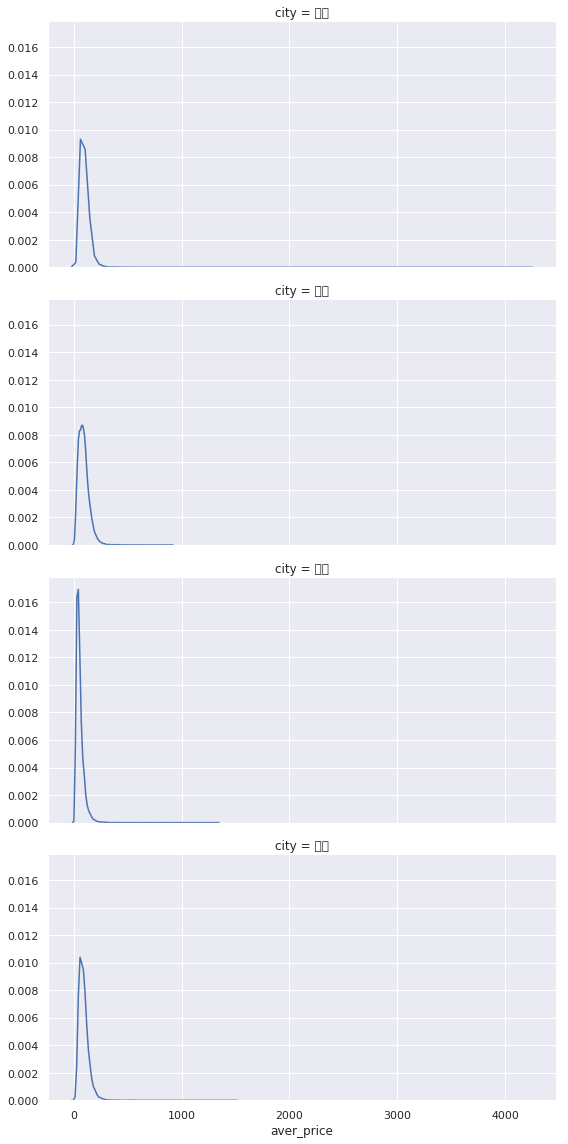

In [30]:
data['aver_price'] = np.round(data['rent_price_listing']/data['rent_area'],1)
g = sns.FacetGrid(data,row='city',height=4,aspect=2)
g=g.map(sns.kdeplot,'aver_price')
#round():四舍五入函数


In [31]:
for i in ['北京','上海','深圳','广州']:
    city_data = data[data['city']==i]
    top10_data = city_data.groupby(['city','bizcircle_name'])['aver_price'].mean().nlargest(10)
    print(top10_data)


city  bizcircle_name
北京    交道口               287.410000
      东四                237.744828
      东单                216.866667
      金宝街               211.408333
      地安门               208.658333
      金融街               204.356198
      宣武门               199.469231
      中关村               197.575676
      西四                189.171429
      东大桥               178.690541
Name: aver_price, dtype: float64
city  bizcircle_name
上海    新天地               215.929310
      衡山路               205.459756
      静安寺               194.550000
      淮海中路              182.407273
      南京西路              174.900565
      建国西路              173.696386
      镇宁路               173.016379
      西藏北路              165.444068
      黄浦滨江              154.007407
      江宁路               153.081633
Name: aver_price, dtype: float64
city  bizcircle_name
深圳    深圳湾               193.168261
      香蜜湖               175.444231
      福田中心              175.411574
      红树湾               163.887912
      后海                154.721

In [48]:
bc_top10 = data.groupby(['city', 'bizcircle_name'])['aver_price'].mean().nlargest(50).reset_index()['city'].value_counts()
bar = Bar('每平方米租金前50的北上广深各商圈的数量',width=400)
bar.add('',bc_top10.index,bc_top10.values,is_stack=True,
       xaxis_label_textsize=16,yaxis_label_textsize=16,is_label_show=True)
bar

In [58]:
def get_top10_bc(city,data=data):
    top10_bc = data[(data['city']==city)&(data['bizcircle_name']!='')].groupby('bizcircle_name')['aver_price'].mean().nlargest(10)
    bar = Bar(city + '市每平米平均租金top10的商圈',width=1000)
    bar.add('',top10_bc.index,top10_bc.values,is_stack=True,
           xaxis_label_textsize=16,yaxis_label_textsize=16,is_label_show=False)
    return bar

In [59]:
get_top10_bc('北京')

In [60]:
get_top10_bc('上海')

In [61]:
get_top10_bc('深圳')

In [62]:
get_top10_bc('广州')

## 房价和与地铁楼距离的关系

In [63]:
from scipy import stats

In [68]:
def distance_price_relation(city, data=data):
    g = sns.jointplot(x="distance", 
                  y="aver_price", 
                  data=data[(data['city']==city)&
                            (data['aver_price']<=350)].dropna(subset=['distance']), 
                  kind="reg",
                 stat_func=stats.pearsonr)
    g.fig.set_dpi(100)
    g.ax_joint.set_xlabel('最近地铁距离', fontweight='bold')
    g.ax_joint.set_ylabel('每平米租金', fontweight='bold')
    return g

/usr/local/lib/python3.7/site-packages/seaborn/axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


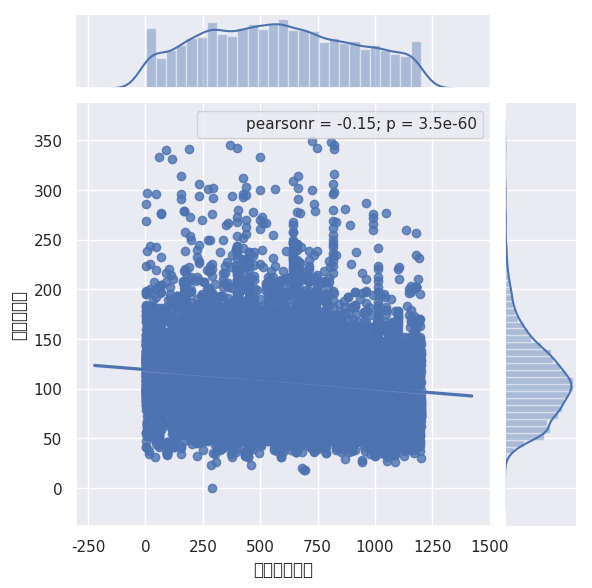

In [69]:
distance_price_relation('北京')

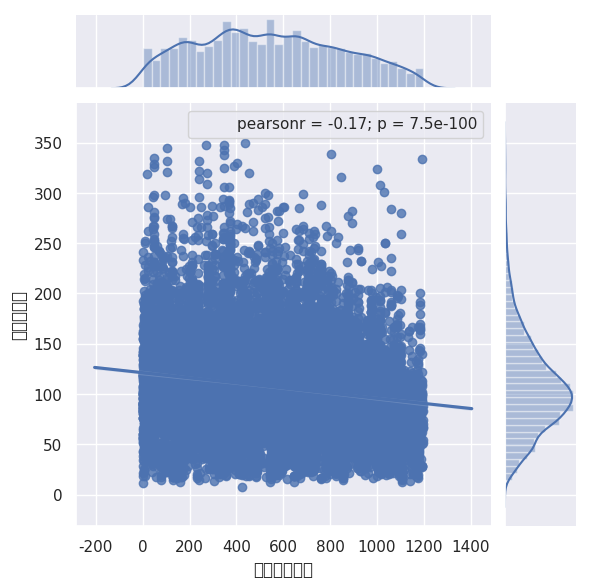

In [70]:
distance_price_relation('上海')

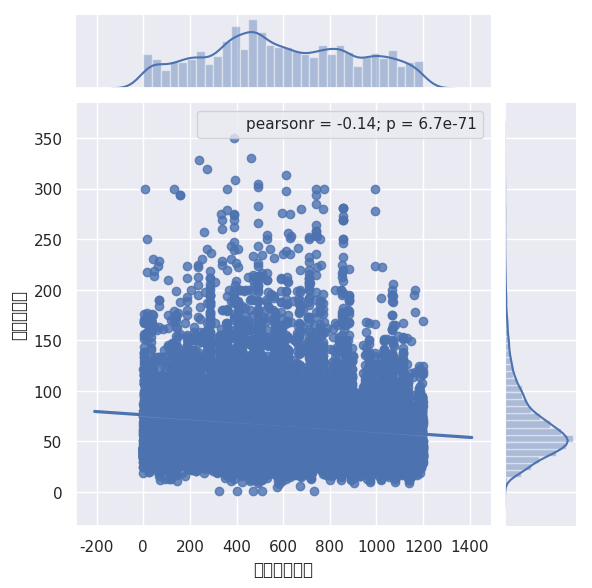

In [71]:
distance_price_relation('广州')

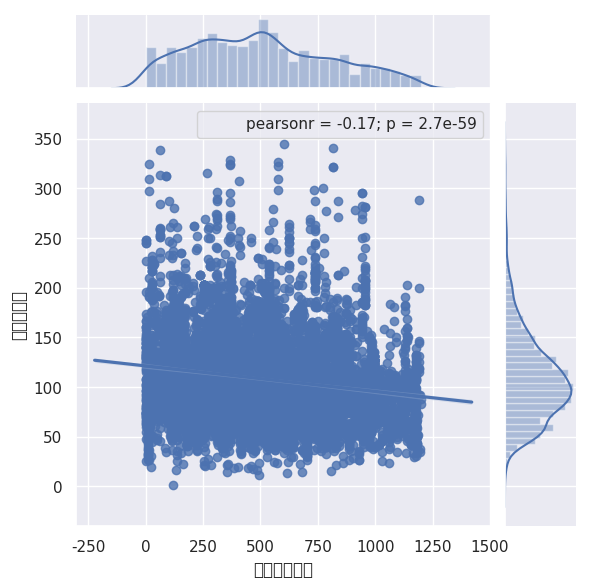

In [72]:
distance_price_relation('深圳')

## 房屋大小对每平米租金的影响

In [89]:
def area_price_relation(city,data=data):
    fig = plt.figure(dpi=100)
    g = sns.lineplot(x='rent_area',y='aver_price',
                    data=data[(data['city']==city)&(data['rent_area']<150)],
                    ci=None)
    g.set_xlabel('面积',fontweight='bold')
    g.set_ylabel('每平米均价',fontweight='bold')
    return g

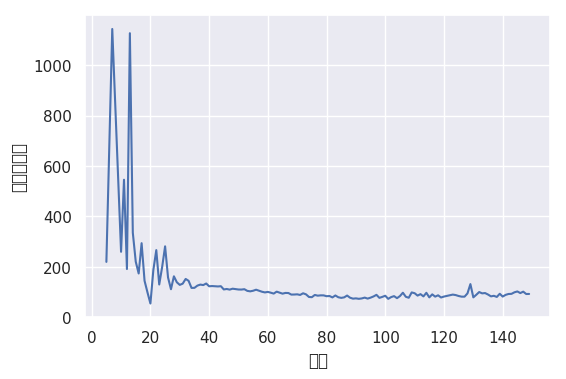

In [90]:
area_price_relation('北京')

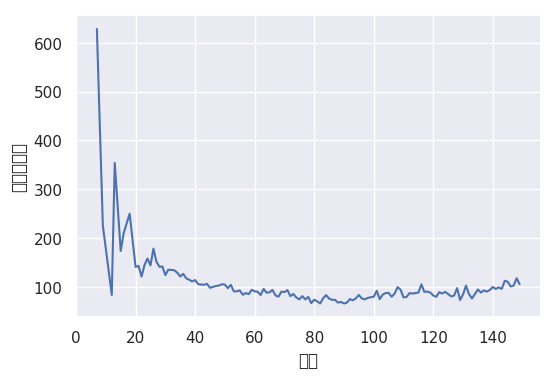

In [91]:
area_price_relation('上海')

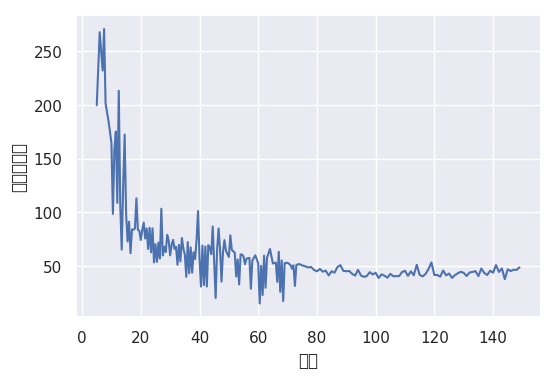

In [93]:
area_price_relation('广州')

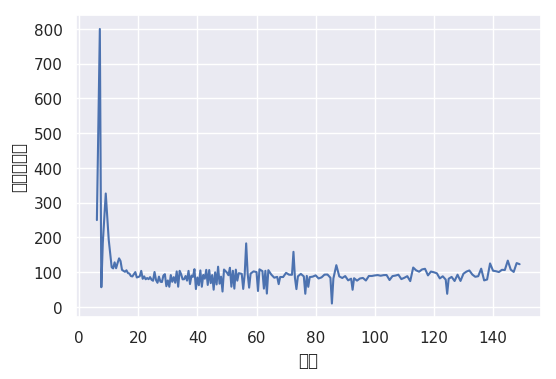

In [94]:
area_price_relation('深圳')

In [95]:
#添加新列is_dep是否是公寓，根据house_title和house_tag列 用contain函数（表示判断字符串是否包含子字符串）
data['is_dep'] = (data['house_title'].str.contains('公寓')+data['house_tag'].str.contains('公寓'))>0

In [96]:
#每个城市公寓占比
for city in ['北京','上海','广州','深圳']:
    print(city+'的公寓占整体房源的比例为：{}%。'.format(np.round(data[data['city']==city]['is_dep'].mean()*100,2)))

北京的公寓占整体房源的比例为：1.87%。
上海的公寓占整体房源的比例为：4.15%。
广州的公寓占整体房源的比例为：20.18%。
深圳的公寓占整体房源的比例为：50.02%。


## 租个人房源还是公寓好

In [101]:
is_dep = data[(data['city'].isin(['广州','深圳']))&(data['is_dep']==1)].groupby('city')['aver_price'].mean()
not_dep = data[(data['city'].isin(['广州','深圳']))&(data['is_dep']==1)].groupby('city')['aver_price'].mean()

In [105]:
bar = Bar('个人房源和公寓每平米租金的区别',width=600)
bar.add('个人房源',not_dep.index,np.round(not_dep.values,0),legent_text_size=20,xaxis_label_textsize=20,yaxis_label_textsize=20,
       xaxis_rotate=20,yaxis_min=8,legend_top=30,is_label=True)
bar.add('公寓',is_dep.index,np.round(is_dep.values,0),legent_text_size=20,xaxis_label_textsize=20,yaxis_label_textsize=20,
       yaxis_min=0,legend_top=30,is_label=True)
bar

## 精装修对房价的影响

In [106]:
data['decoration'] = data[data['house_tag'].notna()]['house_tag'].str.contains('精装')

In [108]:
decorated = data[data['decoration']==1].groupby('city')['aver_price'].mean()
non_decorated = data[data['decoration']!=1].groupby('city')['aver_price'].mean()

In [109]:
decorated

city
上海    122.697792
北京    109.287356
广州     87.699059
深圳    103.672926
Name: aver_price, dtype: float64

In [111]:
bar = Bar('各城市是否装修对房价的影响',width = 1000)
bar.add('精装',decorated.index,np.round(decorated.values,2),
        xaxis_label_size=20,yaxis_label_size = 20,is_label_show=True)
bar.add('简装',non_decorated.index,np.round(non_decorated.values,2),
        xaxis_label_size=20,yaxis_label_size = 20,is_label_show=True)

In [114]:
is_dec_dep = data[(data['decoration']==1)&(data['is_dep']==1)].groupby('city')['aver_price'].mean()
is_dec_nodep = data[(data['decoration']==1)&(data['is_dep']==0)].groupby('city')['aver_price'].mean()
no_dec_dep = data[(data['decoration']==0)&(data['is_dep']==1)].groupby('city')['aver_price'].mean()
no_dec_nodep = data[(data['decoration']==0)&(data['is_dep']==0)].groupby('city')['aver_price'].mean()

In [118]:
bar = Bar('各城市是否装修与租房类型对房价的综合影响',width=1000,height=400)
bar.add('装修+公寓',is_dec_dep.index,np.round(is_dec_dep.values,2),
       xaxis_label_index=20,yaxis_label_index=20,is_label_true=True)
bar.add('装修+非公寓',is_dec_nodep.index,np.round(is_dec_nodep.values,2),
       xaxis_label_index=20,yaxis_label_index=20,is_label_true=True)
bar.add('非装修+公寓',no_dec_dep.index,np.round(no_dec_dep.values,2),
       xaxis_label_index=20,yaxis_label_index=20,is_label_true=True)
bar.add('非装修+非公寓',no_dec_nodep.index,np.round(no_dec_nodep.values,2),
       xaxis_label_index=20,yaxis_label_index=20,is_label_true=True)

## 北方集中供暖对房价的影响

In [122]:
data['cen_heating'] = data['house_tag'].str.contains('集中供暖')
heating = data[data['city']=='北京'].groupby(data['cen_heating'])['aver_price'].mean()

In [123]:
bar = Bar('北京市集中供暖因素对房价的影响',width=600)
bar.add('',heating.index,np.round(heating.values,2),is_label_show=True)

## 各市租房主要影响因素

In [124]:
def layout_top3(city,data):
    layout_data = data[data['city']==city]['layout'].value_counts().nlargest(3)
    bar = Bar(city +' 最受欢迎的户型',width = 600)
    bar.add("", layout_data.index, layout_data.values, 
        legend_text_size=18,xaxis_label_textsize=14,yaxis_label_textsize=18,
        xaxis_rotate=20, yaxis_min=8, legend_top=30, is_label_show=True)
    return bar

In [125]:
layout_top3('北京', data)

In [126]:
layout_top3('上海', data)

In [127]:
layout_top3('广州', data)

In [128]:
layout_top3('深圳', data)

In [157]:
from pyecharts import WordCloud
from collections import Counter

In [171]:
bj_tag = []
for st in data[data['city']=='北京'].dropna(subset=['house_tag'])['house_tag']:
    bj_tag.extend(st.split(' '))

name, value = WordCloud.cast(Counter(bj_tag))
wordcloud = WordCloud(width=500, height=500)
wordcloud.add("", name, value, word_size_range=[10, 100])
wordcloud

In [170]:
sh_tag = []
for st in data[data['city']=='上海'].dropna(subset=['house_tag'])['house_tag']:
    bj_tag.extend(st.split(' '))

name, value = WordCloud.cast(Counter(bj_tag))
wordcloud = WordCloud(width=500, height=500)
wordcloud.add("", name, value, word_size_range=[1, 100])
wordcloud

In [175]:
gz_tag = []
for st in data[data['city']=='广州'].dropna(subset=['house_tag'])['house_tag']:
    bj_tag.extend(st.split(' '))

name, value = WordCloud.cast(Counter(bj_tag))
wordcloud = WordCloud(width=500, height=500)
wordcloud.add("", name, value, word_size_range=[1, 100])
wordcloud

In [177]:
sz_tag = []
for st in data[data['city']=='深圳'].dropna(subset=['house_tag'])['house_tag']:
    bj_tag.extend(st.split(' '))

name, value = WordCloud.cast(Counter(bj_tag))
wordcloud = WordCloud(width=500, height=500)
wordcloud.add("", name, value, word_size_range=[1, 100],shape='diamond')
wordcloud